# Importando Dados e Traduzindo Dados

## Importando Base de Dados

In [161]:
import pandas as pd

dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


---

## Traduzindo Colunas e Campos

In [162]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [163]:
renomear = {
    'total_bill': 'valor_da_conta', 
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'refeicao',
    'size': 'total_de_pessoas'
}

In [164]:
type(dados)

pandas.core.frame.DataFrame

In [165]:
gorjetas = dados.rename(columns=renomear)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [166]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [167]:
sim_nao = {
    'No' : 'Não',
    'Yes': 'Sim'
}

In [168]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [169]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [170]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [171]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [172]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [173]:
dias = {
        'Sun': 'Domingo',
        'Sat': 'Sabado',
        'Thur': 'Quinta',
        'Fri': 'Sexta'
}

In [174]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [175]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [176]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

In [177]:
gorjetas.refeicao.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [178]:
refeicao = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [179]:
gorjetas.refeicao = gorjetas.refeicao.map(refeicao)

In [180]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


---

---

# Comparando Distribuições de Maneira Explanatória

## Seaborn e Scatterplot

In [181]:
import seaborn as sns

In [182]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: matplotlib, pandas, scipy, numpy
Required-by: missingno


### Análise 1 - Valor da Conta e Gorjeta

In [183]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana', 'refeicao',
       'total_de_pessoas'],
      dtype='object')

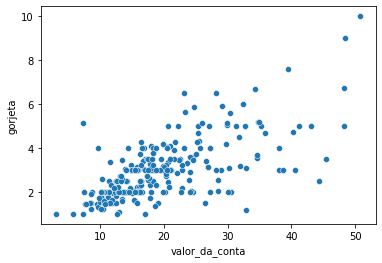

In [184]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)
valor_gorjeta

<font color = green> **Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [185]:
print(f'A base de dados contém {gorjetas.shape[0]}')
print(f'Registros não nulos:')
gorjetas.count()

A base de dados contém 244
Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
refeicao            244
total_de_pessoas    244
dtype: int64

---

## Coluna Porcentagem

In [186]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [195]:
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta) * 100

In [196]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.944673
1,10.34,1.66,Não,Domingo,Jantar,3,16.054159
2,21.01,3.50,Não,Domingo,Jantar,3,16.658734
3,23.68,3.31,Não,Domingo,Jantar,2,13.978041
4,24.59,3.61,Não,Domingo,Jantar,4,14.680765


In [197]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [198]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


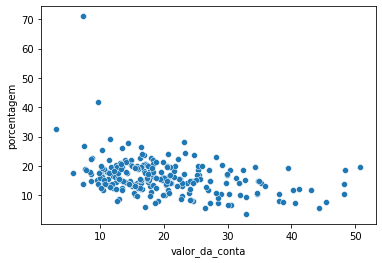

In [199]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

<font color = green> **Visualmente o valor da conta não é proporcional ao valor da gorjeta**

---

## Relplot e Implot

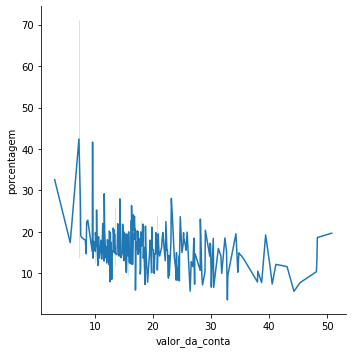

In [201]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

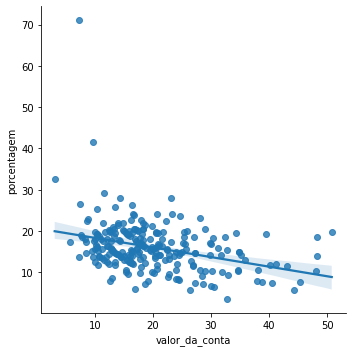

In [203]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

In [ ]:
# primeiro_plot.set_title('Análise do valor da gorjeta em função do valor da conta')
# primeiro_plot.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')
# imagem = primeiro_plot.get_figure()
# imagem.savefig('imagem.png')